In [1]:
import pandas as pd
import seaborn as sns


In [2]:
covid_data = pd.read_csv(r"/Users/nathannusaputra/Berkeley/COVID19_Project/Data_Raw/us-counties.csv")
income_data = pd.read_csv(r"/Users/nathannusaputra/Berkeley/COVID19_Project/Data_Raw/Kaggle_USHousehold_Income/kaggle_income.csv", encoding='latin-1')


In [3]:
# check the first couple of rows
covid_data.head()
covid_data.describe()

covid_data[covid_data.cases > 100000]

income_data.head()


,id,State_Code,State_Name,State_ab,County,City,Place,Type,Primary,Zip_Code,Area_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,sum_w
0,1011000,1,Alabama,AL,Mobile County,Chickasaw,Chickasaw city,City,place,36611,251,10894952,909156,30.771450,-88.079697,38773,30506,33101,1638.260513
1,1011010,1,Alabama,AL,Barbour County,Louisville,Clio city,City,place,36048,334,26070325,23254,31.708516,-85.611039,37725,19528,43789,258.017685
2,1011020,1,Alabama,AL,Shelby County,Columbiana,Columbiana city,City,place,35051,205,44835274,261034,33.191452,-86.615618,54606,31930,57348,926.031000
3,1011030,1,Alabama,AL,Mobile County,Satsuma,Creola city,City,place,36572,251,36878729,2374530,30.874343,-88.009442,63919,52814,47707,378.114619
4,1011040,1,Alabama,AL,Mobile County,Dauphin Island,Dauphin Island,Town,place,36528,251,16204185,413605152,30.250913,-88.171268,77948,67225,54270,282.320328


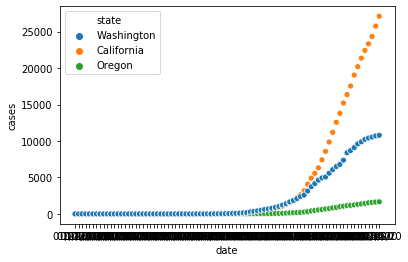

In [4]:

# clean data
covid_data["date"] = pd.to_datetime(covid_data["date"])
covid_data["date"] = covid_data["date"].dt.strftime('%m/%d/%y')


# group by state
states_data = covid_data.groupby(['date','state'], as_index=False).agg('sum').drop(columns=['fips'])
west_coast = states_data[states_data.state.isin(["Washington","Oregon","California"])]

states_data[states_data.date=='04/01/20']
ax = sns.scatterplot(x="date", y="cases",hue="state", data=west_coast)


In [5]:
# average income data
income_data[income_data.City=='Snohomish']

income_city_df = income_data.groupby(['State_Name', 'State_ab', 'City'], as_index=False).agg('mean').drop(columns=['ALand', 'Zip_Code', 'AWater', 'Lat', 'Lon', 'Median', 'Stdev'])


final_df = covid_data.merge(income_data, how='left', left_on='county', right_on='City')



In [ ]:
final_df.head()